# Mock Spectrum
In this notebook, we will explore how to create mock spectra.

In [1]:
# Imports
import sys
import numpy as np
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LUCI.LuciSim import Spectrum, abs_template
import matplotlib.pyplot as plt
from scipy import interpolate

### Inputs
There are a number of inputs we need in order to create a mock spectrum. 

They are the following:

 - lines: List of lines to model (e.x. ['Halpha'])
 - fit_function: Function used to model lines  (options: 'sinc', 'gaussian', 'sincgauss')
 - ampls: List of amplitudes for emission lines
 - velocity: List of velocities of emission lines; if not a list, then all velocities are set equal
 - broadening: List of broadening of emissino lines; ditto above
 - filter: SITELLE Filter (e.x. 'SN3')
 - resolution: Spectral resolution
 - snr: Signal to noise ratio
 


In [2]:
lines = ['Halpha', 'NII6583', 'NII6548', 'SII6716', 'SII6731']
fit_function = 'sincgauss'
ampls = [2, 1, 1, 0.5, 0.45]  # Just randomly choosing these
velocity = 0  # km/s
broadening = 10  # km/s
filter_ = 'SN3'
resolution = 5000
snr = 100

### Create Spectrum
Now we can actually create the spectra with one simple command!

In [3]:
spectrum_axis, spectrum = Spectrum(lines, fit_function, ampls, velocity, broadening, filter_, resolution, snr).create_spectrum()
spectrum += 1  # Add a continuum

/home/carterrhea/Documents/LUCI/LUCI/LuciFunctions.py:234: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "evaluate" failed type inference due to: Untyped global name 'frozen_values': Cannot determine Numba type of <class 'function'>

File "../LUCI/LuciFunctions.py", line 257:
    def evaluate(self, channel, theta, line_num, sinc_width, line_names=None):
        <source elided>
                thetas[3*model_num] = theta[model_num]  # Get amplitude -- the only parameter being fit
                frozen_velocity, frozen_broadening = frozen_values(line_names[model_num], self.initial_values)
                ^

  @jit(fastmath=True)
/home/carterrhea/Documents/LUCI/LUCI/LuciFunctions.py:234: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "evaluate" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../LUCI/LuciFunctions.py",

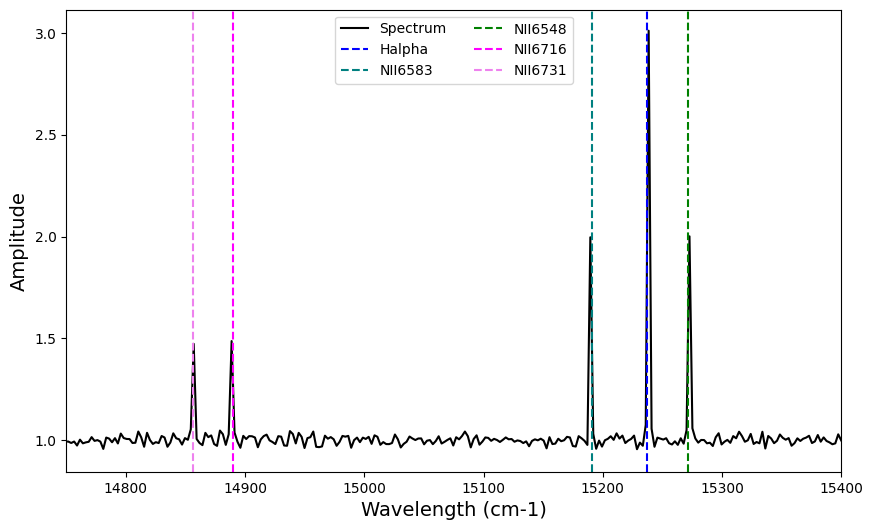

In [4]:
plt.figure(figsize=(10,6))
plt.plot(spectrum_axis, spectrum, color='black', label='Spectrum')
plt.xlim(14750, 15400)
plt.xlabel('Wavelength (cm-1)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.axvline(1e7/656.3, label='Halpha', color='blue', linestyle='--')
plt.axvline(1e7/658.3, label='NII6583', color='teal', linestyle='--')
plt.axvline(1e7/654.8, label='NII6548', color='green', linestyle='--')
plt.axvline(1e7/671.6, label='NII6716', color='magenta', linestyle='--')
plt.axvline(1e7/673.1, label='NII6731', color='violet', linestyle='--')
plt.legend(ncol=2)

plt.show()

## Basic Absorption
We can include a basic absorption profile in Halpha by included a wide negative amplitude trough.

In [5]:
lines = ['Halpha']
fit_function = 'sincgauss'
ampls = [-0.25]  # Just randomly choosing these
velocity = 0  # km/s
broadening = 100  # km/s
filter_ = 'SN3'
resolution = 5000
snr = 100

spectrum_axis, spectrum_abs = Spectrum(lines, fit_function, ampls, velocity, broadening, filter_, resolution, snr).create_spectrum()


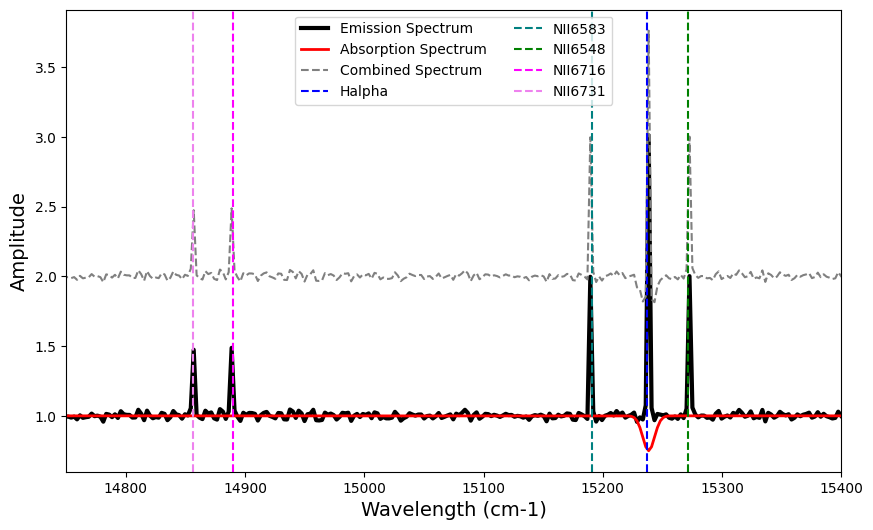

In [6]:
plt.figure(figsize=(10,6))
plt.plot(spectrum_axis, spectrum, color='black', linewidth=3, label='Emission Spectrum')
plt.plot(spectrum_axis, spectrum_abs, color='red',  linewidth=2, label='Absorption Spectrum')
plt.plot(spectrum_axis, spectrum+spectrum_abs, color='grey', linestyle='--', label='Combined Spectrum')
plt.xlim(14750, 15400)
plt.xlabel('Wavelength (cm-1)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.axvline(1e7/656.3, label='Halpha', color='blue', linestyle='--')
plt.axvline(1e7/658.3, label='NII6583', color='teal', linestyle='--')
plt.axvline(1e7/654.8, label='NII6548', color='green', linestyle='--')
plt.axvline(1e7/671.6, label='NII6716', color='magenta', linestyle='--')
plt.axvline(1e7/673.1, label='NII6731', color='violet', linestyle='--')
plt.legend(ncol=2)

plt.show()

# Using Stellar Templates

Instead of using a simple Gaussian, we have implemented stellar templates based of the Miles catalog as laid out in [ppxf](https://www-astro.physics.ox.ac.uk/~cappellari/software/). If you want to use these templates, be sure to have ppxf installed in your python environment.

We need to provide the resolution of the spectrum, the filter that we are interested in, the age of the stellar population in Gyr, and the metallicity in Solar Units.

In [16]:
wavenumber, amplitudes = abs_template(resolution=5000, filter='SN3', age=1, metal=0.2)
# Interpolate onto the same spectral axis
f = interpolate.interp1d(wavenumber, amplitudes, fill_value='extrapolate')
amplitudes_interp = f(spectrum_axis)

(14750.0, 15400.0)

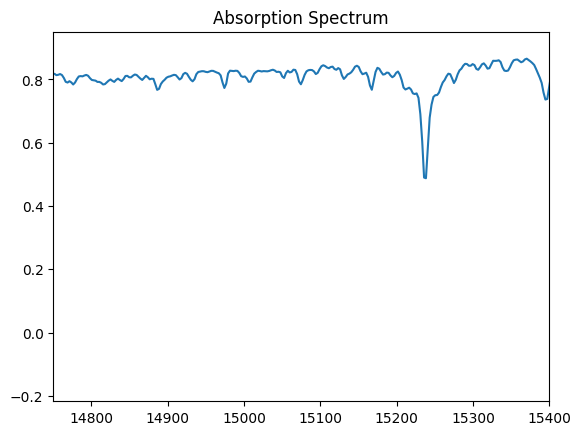

In [21]:
plt.title('Absorption Spectrum')
plt.plot(spectrum_axis, amplitudes_interp)
plt.xlim(14750, 15400)

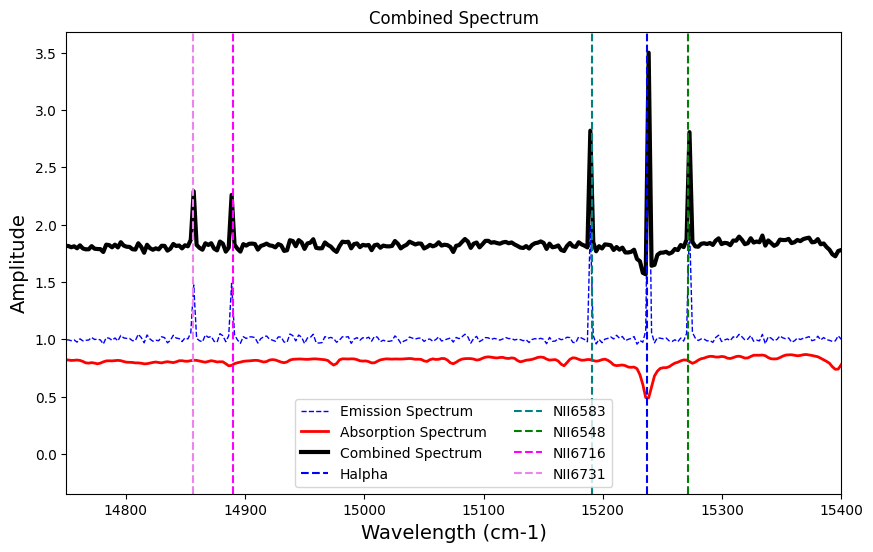

In [22]:
plt.figure(figsize=(10,6))
plt.plot(spectrum_axis, spectrum, color='blue', linewidth=1, linestyle='--', label='Emission Spectrum')
plt.plot(spectrum_axis, amplitudes_interp*np.nanmedian(spectrum), color='red',  linewidth=2, label='Absorption Spectrum')
plt.plot(spectrum_axis, spectrum+amplitudes_interp*np.median(spectrum), color='black', linewidth=3, label='Combined Spectrum')
plt.xlim(14750, 15400)
plt.title('Combined Spectrum')
plt.xlabel('Wavelength (cm-1)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.axvline(1e7/656.3, label='Halpha', color='blue', linestyle='--')
plt.axvline(1e7/658.3, label='NII6583', color='teal', linestyle='--')
plt.axvline(1e7/654.8, label='NII6548', color='green', linestyle='--')
plt.axvline(1e7/671.6, label='NII6716', color='magenta', linestyle='--')
plt.axvline(1e7/673.1, label='NII6731', color='violet', linestyle='--')
plt.legend(ncol=2)
plt.show()